# Cardio Vascular Disease

### 
* A leading cause of death globally is Cardiovascular diseases (CVDs).  
• CVDs accounted for 31% of all deaths worldwide.  
• Current data indicates 4 of 5 CVD deaths are due to hear attacks & strokes (1/3rd of these deaths occurred in people < 70yo.  
• Heart failure is a common event cause by CVDs.  
• This examines 11 features to evaluate their effectiveness as predictors for possible heart disease.   

This examines data obtained from this [data source.](https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1)

Data in this set represents those 11 elements from 918 observations. Those observations are a combination of 5 datasets independently available 
* Cleveland: 303 observations 
* Hungarian: 294 observations
* Switzerland: 123 observations 
* Long Beach VA: 200 observations 
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Load Data

In [2]:
file = 'data\heart.csv'
df = pd.read_csv(file)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Information about Data Elements
### 
**Age**: age of the patient [years]  
**Sex**: sex of the patient [M: Male, F: Female]  
**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
**RestingBP**: resting blood pressure [mm Hg]  
**Cholesterol**: serum cholesterol [mm/dl]  
**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or
depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]  
**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]  
**Oldpeak**: oldpeak = ST [Numeric value measured in depression]  
**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
**HeartDisease**: output class [1: heart disease, 0: Normal]  


# Exploratory Data Analysis

## Profiling and cleaning data as necessary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y 

In [5]:
df.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [6]:
df.notna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,True,True,True,True,True,True,True,True,True,True,True
914,True,True,True,True,True,True,True,True,True,True,True,True
915,True,True,True,True,True,True,True,True,True,True,True,True
916,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
df.notnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,True,True,True,True,True,True,True,True,True,True,True
914,True,True,True,True,True,True,True,True,True,True,True,True
915,True,True,True,True,True,True,True,True,True,True,True,True
916,True,True,True,True,True,True,True,True,True,True,True,True


In [9]:
# checking for NaN values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# count for whole dataframe
df.isna().sum().sum()

0

In [11]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


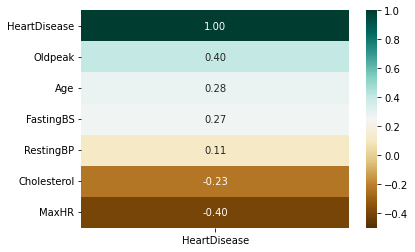

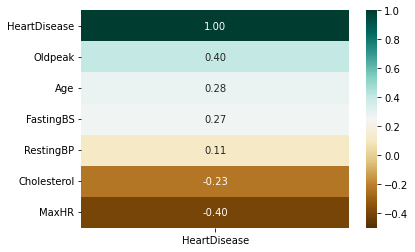

In [12]:
targetHeatmap = sns.heatmap(
    df.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), 
    vmin=-0.5, vmax=1, annot=True, cmap='BrBG', fmt = '.2f'
    )
fig = targetHeatmap.get_figure()
fig.savefig('images\heartdiseaseCorr.png')
fig

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

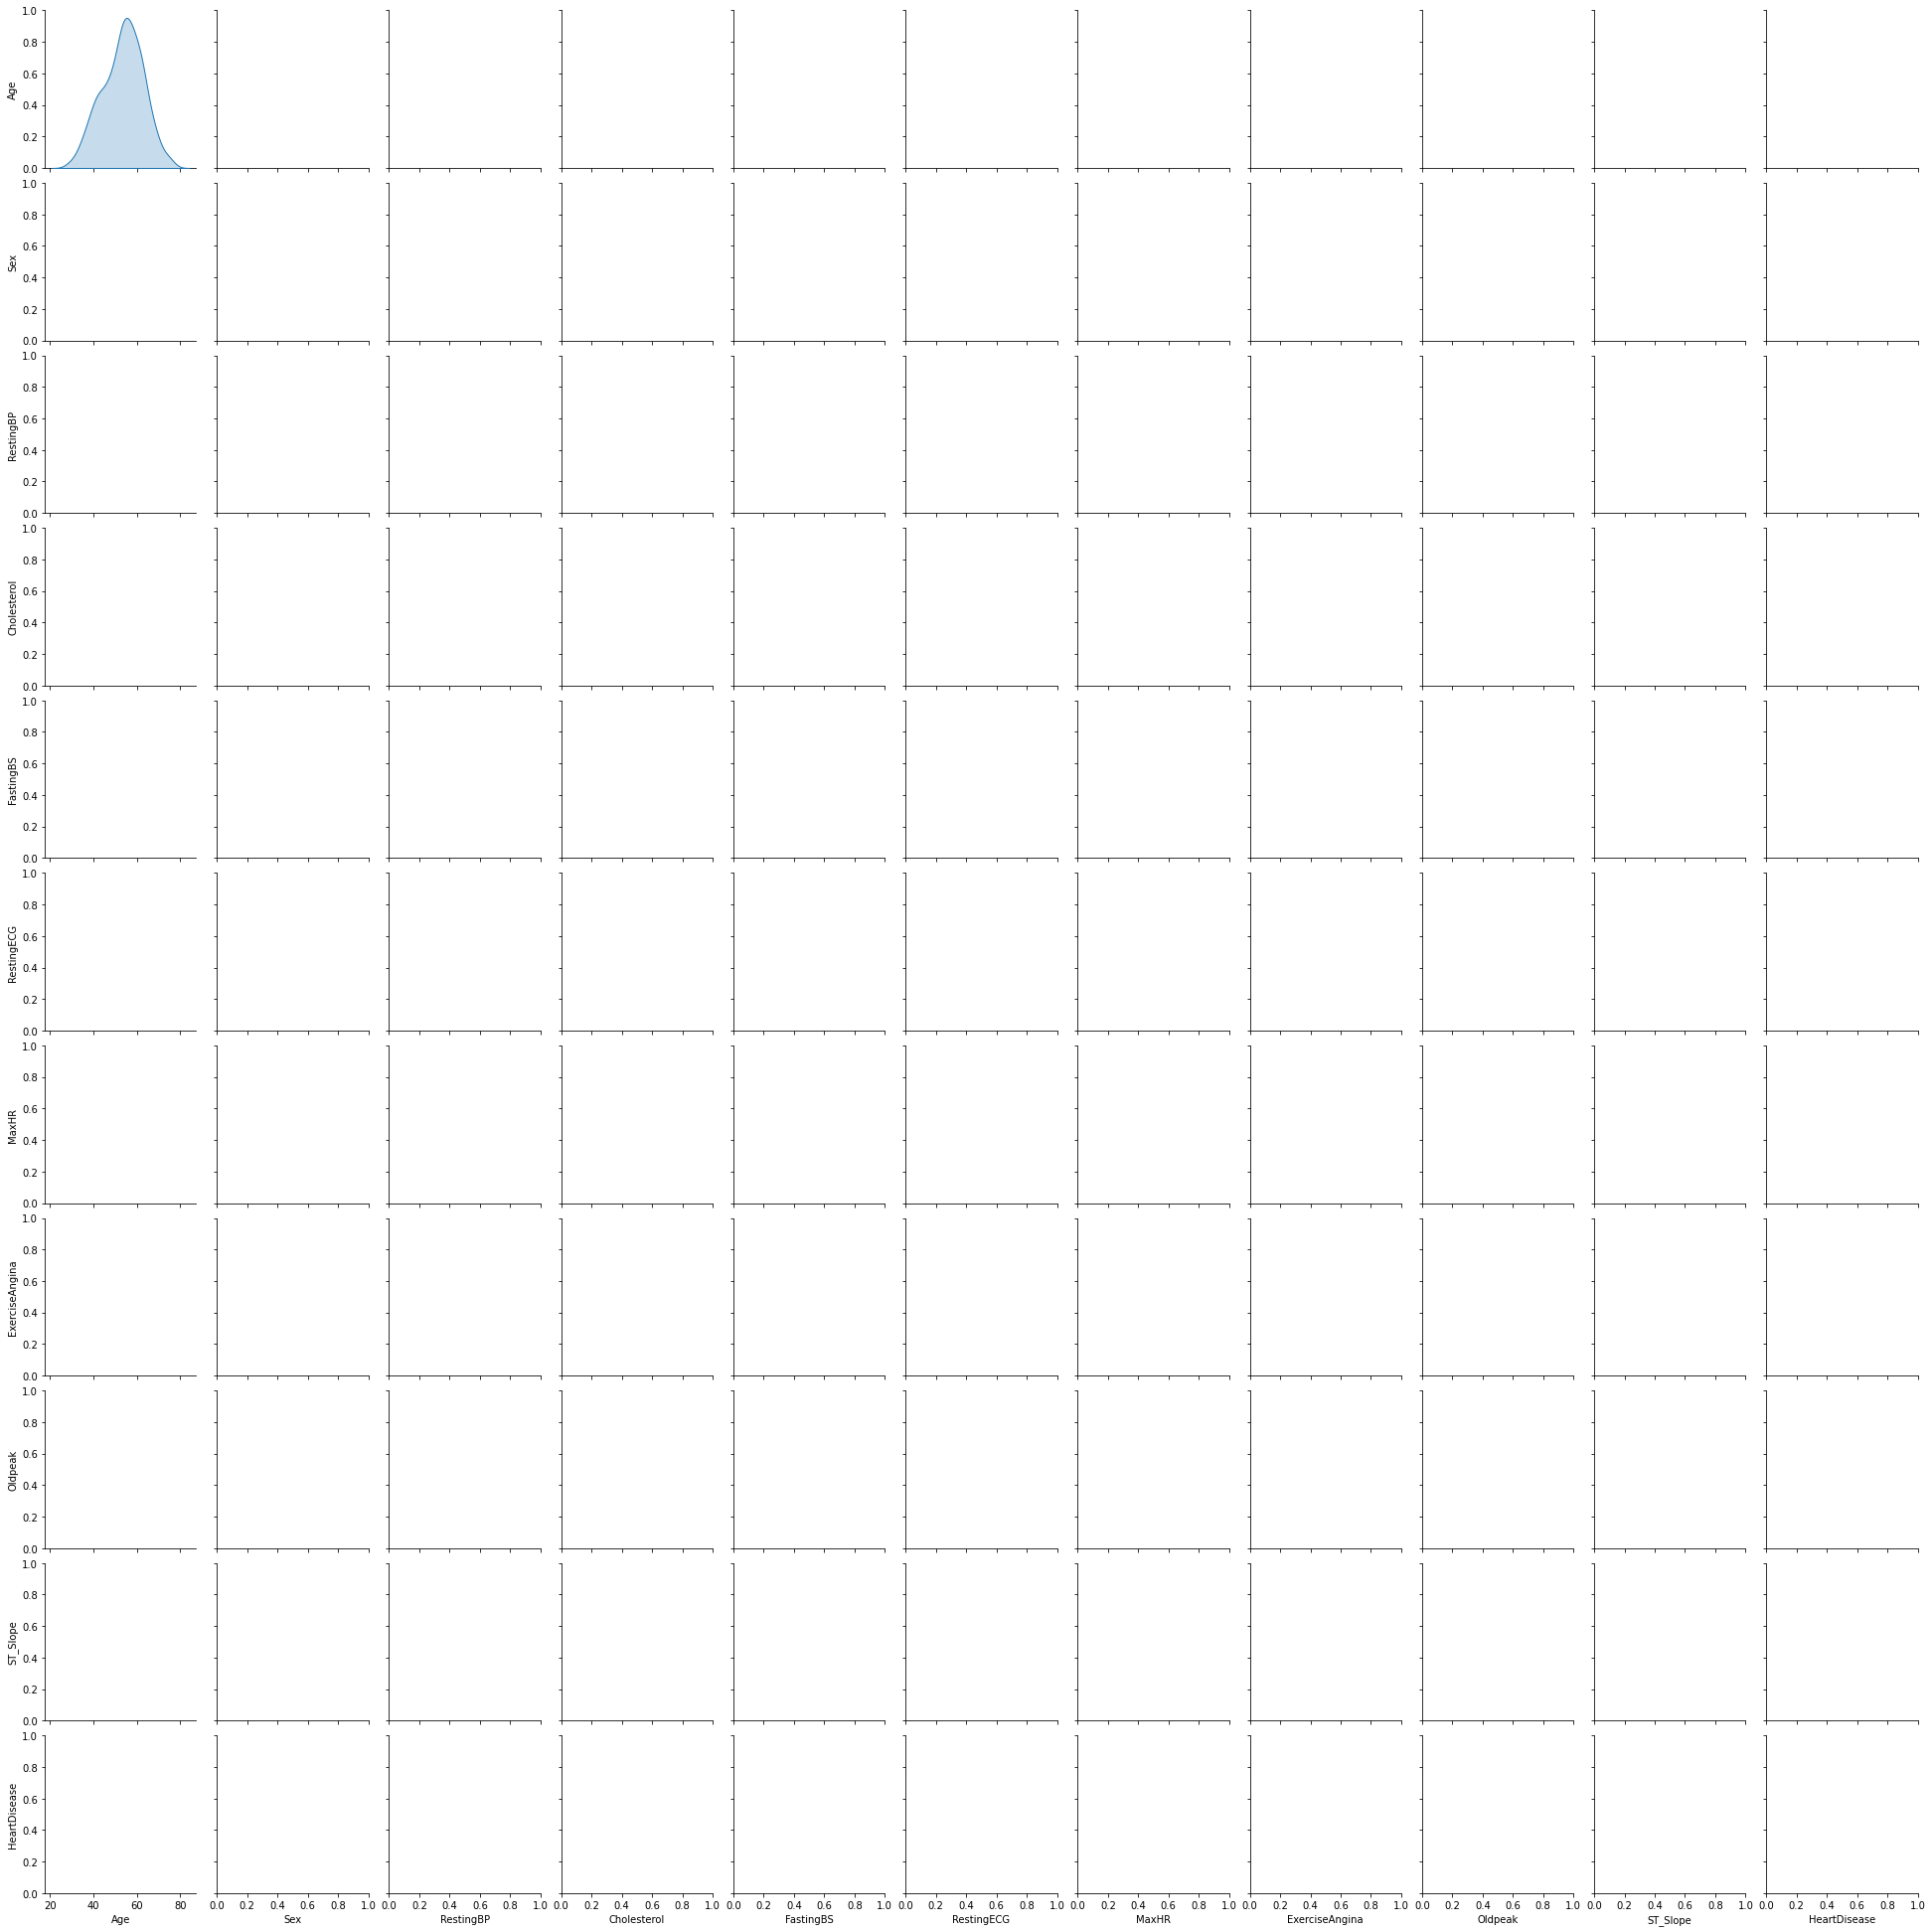

In [13]:
# Feature Pair Plots
featuresList = ['Age','Sex','RestingBP','Cholesterol','FastingBS','RestingECG',
    'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
sns.pairplot(data=df,
    x_vars=featuresList,
    y_vars=featuresList,
    diag_kind='kde'
)

#### 
Encode categorical variables and redo pairplots and heat maps

In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
# encode categorical variables
categorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoded = pd.get_dummies(df[categorical])
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sex_F              918 non-null    uint8
 1   Sex_M              918 non-null    uint8
 2   ChestPainType_ASY  918 non-null    uint8
 3   ChestPainType_ATA  918 non-null    uint8
 4   ChestPainType_NAP  918 non-null    uint8
 5   ChestPainType_TA   918 non-null    uint8
 6   RestingECG_LVH     918 non-null    uint8
 7   RestingECG_Normal  918 non-null    uint8
 8   RestingECG_ST      918 non-null    uint8
 9   ExerciseAngina_N   918 non-null    uint8
 10  ExerciseAngina_Y   918 non-null    uint8
 11  ST_Slope_Down      918 non-null    uint8
 12  ST_Slope_Flat      918 non-null    uint8
 13  ST_Slope_Up        918 non-null    uint8
dtypes: uint8(14)
memory usage: 12.7 KB


In [16]:
encoded

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [20]:
# joing original dataframe and encoded set of features

# create new dataframe and only assign columsn with numerical values
encodedDF = df.drop(columns=categorical)
encodedDF = encodedDF.join(encoded)
encodedDF

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [21]:
headers = encodedDF.columns
headers

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

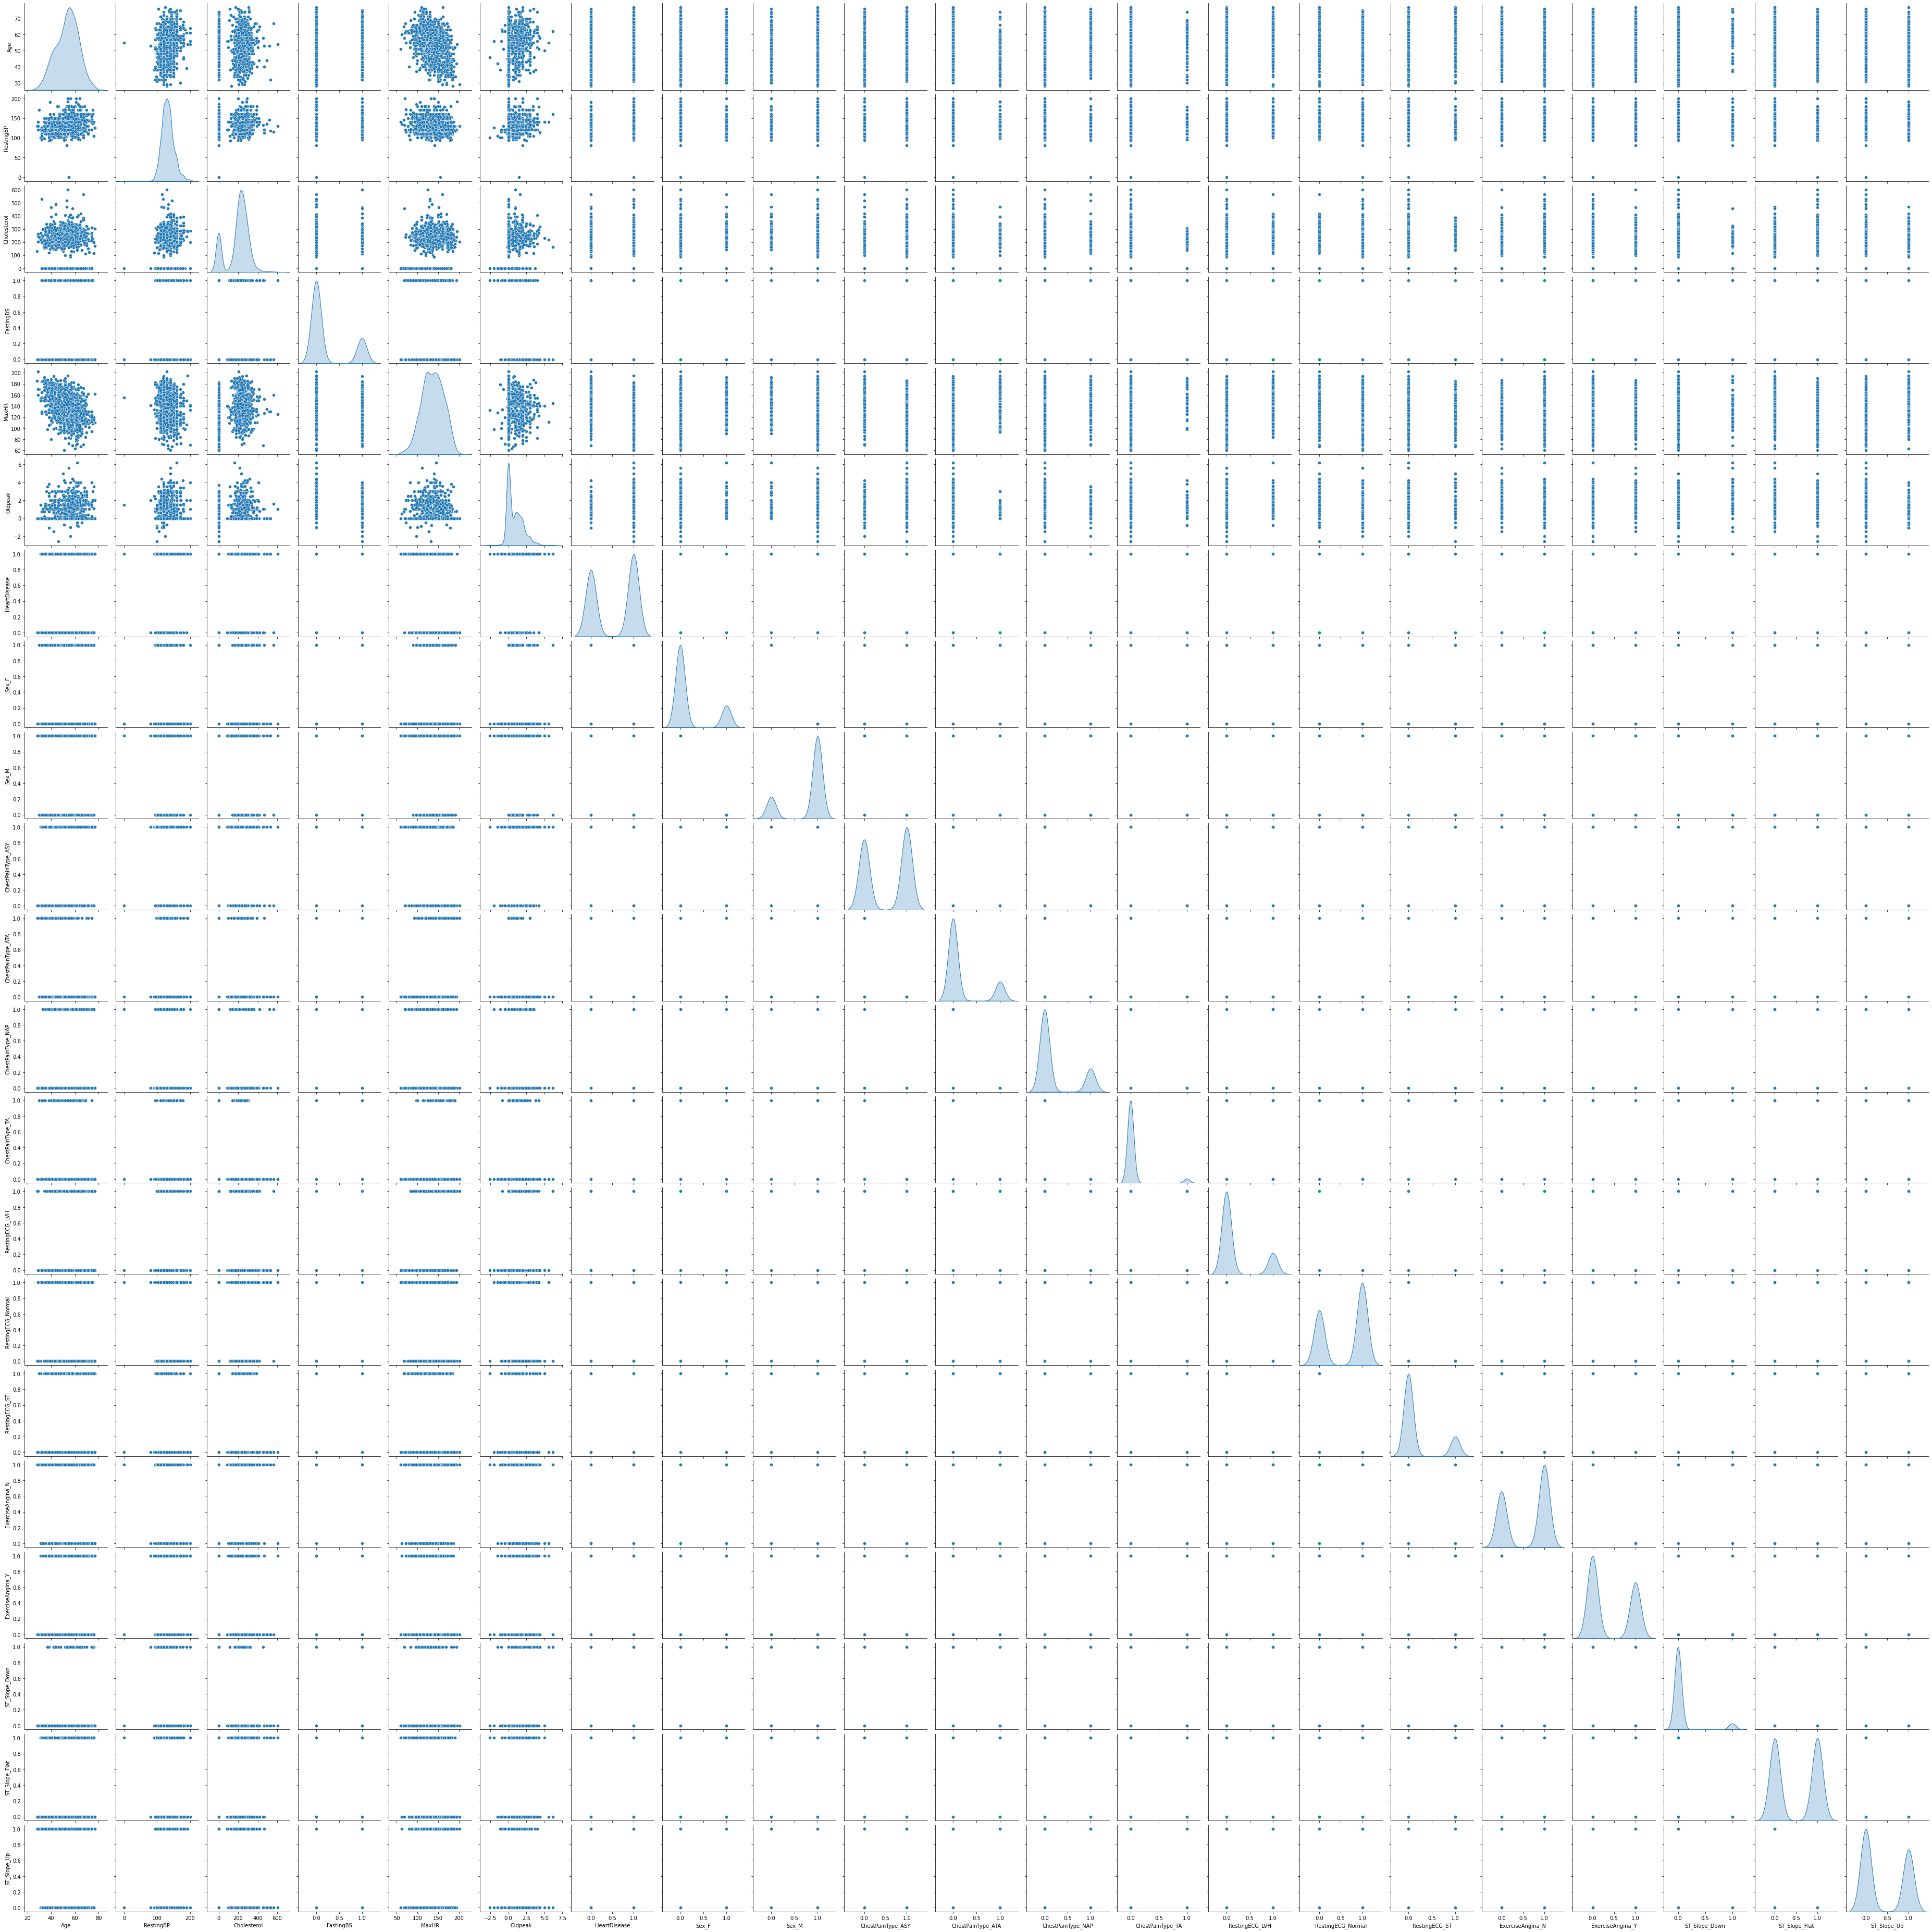

In [22]:
# Feature Pair Plots

sns.pairplot(data=encodedDF,
    x_vars=headers,
    y_vars=headers,
    diag_kind='kde'
)

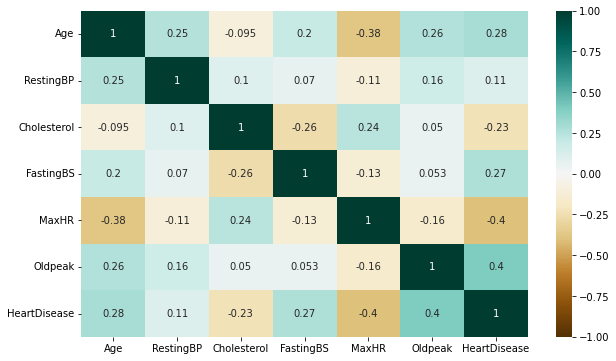

In [23]:
# Triangle heatmap
fig, ax = plt.subplots(figsize= (10,6))
corrImage = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap= 'BrBG', annot=True)
fig = corrImage.get_figure()
fig.savefig('images/correlationHeatMap.png')

In [24]:
# get upper triangle with NumPy method
np.triu(np.ones_like(df.corr()))


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

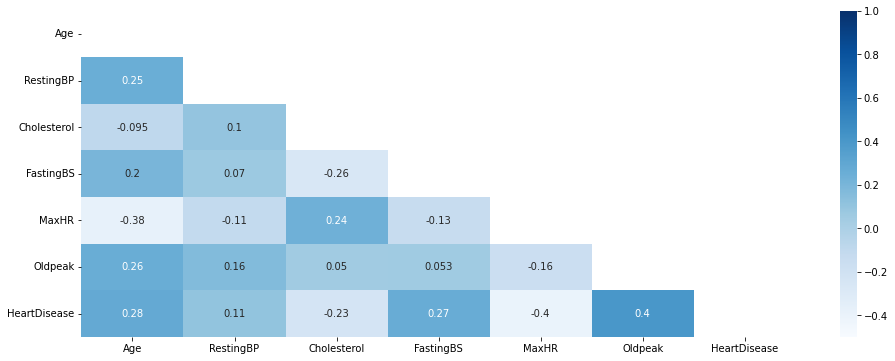

In [25]:
# set plot size
plt.figure(figsize=(16,6))

# create heatmap with lower triangle only
upper = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
triangleHeatMap = sns.heatmap(
    df.corr(), mask=upper, vmin=-0.5, vmax=1, annot=True, cmap='Blues'
    )

fig = triangleHeatMap.get_figure()
fig.savefig('images/TriangleHeatMap.png')

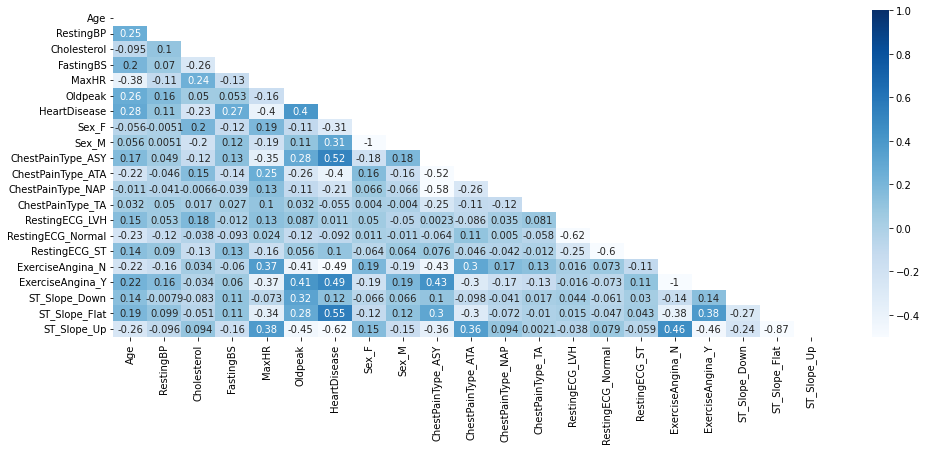

In [26]:
# set plot size
plt.figure(figsize=(16,6))

# create heatmap with lower triangle only
upper = np.triu(np.ones_like(encodedDF.corr(), dtype=np.bool_))
triangleHeatMap = sns.heatmap(
    encodedDF.corr(), mask=upper, vmin=-0.5, vmax=1, annot=True, cmap='Blues'
    )

fig = triangleHeatMap.get_figure()
fig.savefig('images/encodedTriangleHeatMap.png')

# EDA Findings

### Discovery #1
We found ...

# Regression Analysis

###
Scale data?  
Which features?

Feature importance:  
- Cart classification feature
- MLR feature importance
- Random Forest Classifier Feature Importance
- Random Forest Regression Feature Importance

Evaluate
- Random Forest Predictive Accuracy
- Sci-kit learn confusion matrix
- tree model overfit
- K-means elbow plot
